<a href="https://colab.research.google.com/github/xndrbkv/mifi_ml_engineer/blob/main/smoke-detection-ecology/Smoke_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision
!pip install huggingface-hub>=0.25.0
!pip install yolov5
!pip install Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.5/953.5 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.5/417.5 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 109.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4

In [ ]:
# Импорт необходимых библиотек
import yolov5
import torch
import matplotlib.pyplot as plt
import requests
from io import BytesIO
import numpy as np
import cv2
from PIL import Image
import warnings

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
original_load = torch.load
torch.load = lambda *args, **kwargs: original_load(*args, **kwargs, weights_only=False)

model = yolov5.load('keremberke/yolov5n-smoke')
model.conf = 0.25
model.iou = 0.45

config.json:   0%|          | 0.00/80.0 [00:00<?, ?B/s]

best.pt:   0%|          | 0.00/3.90M [00:00<?, ?B/s]


 Обработка изображения 1/4


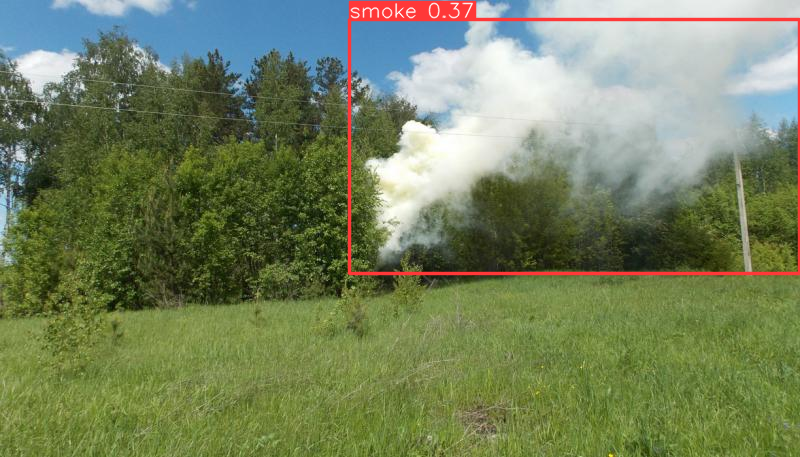


 Обработка изображения 2/4


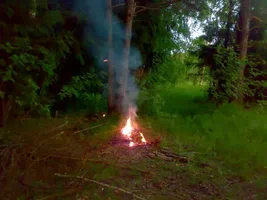


 Обработка изображения 3/4


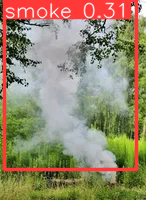


 Обработка изображения 4/4


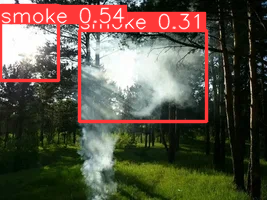

In [ ]:
# Подавление предупреждений о deprecated функциях в PyTorch
warnings.filterwarnings('ignore', category=FutureWarning)

# Список путей к изображениям для анализа
images_list = [
    '/photo/1.jpg',
    '/photo/2.jpg',
    '/photo/3.jpg',
    '/photo/4.jpg'
]

# Основной цикл обработки изображений
for i, img_path in enumerate(images_list):

    print(f"\n Обработка изображения {i+1}/{len(images_list)}")

    # Загрузка изображения с помощью OpenCV
    img = cv2.imread(img_path)

    # Исправление проблемы "readonly" массива в Colab
    if not img.flags['WRITEABLE']:
      img = img.copy()

    # Конвертация цветового пространства из BGR в RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Выполнение инференса (детекции дыма) с помощью YOLOv5 модели
    # Параметр size=640 определяет размер изображения для обработки
    results = model(img_rgb, size=640)

    # Отображение результатов детекции
    plt.imshow(results)
    plt.show()